# FBA and pFBA Simulations

By Garrett Roell and Christina Schenk

Tested on biodesign_3.7 kernel on jprime

This notebook performs flux balance analysis (FBA) and parsimonious FBA for R. opacus in phenol and glucose and creates plots to compare the results with experimental data.

### Method: 
<ol>
<li>Setup imports</li>
<li>Load model and relevant data</li>
<li>Calculate phenol FBA and pFBA solutions</li>
<li>Compare phenol FBA and pFBA flux predictions with 13C-MFA fluxes</li>
<li>Generate phenol 13C-MFA, FBA, and pFBA flux maps</li>
<li>Calculate glucose FBA and pFBA solutions</li>
<li>Compare glucose FBA and pFBA flux predictions with 13C-MFA fluxes</li>
<li>Generate glucose 13C-MFA, FBA, and pFBA flux maps</li>
<li>Evaluate FBA and pFBA growth rate predictions</li>
</ol>

### 1. Setup imports

In [1]:
import cobra
import pandas as pd
import sys

SourceDir = '../src'
sys.path.append(SourceDir)
from utils import *
from cobra_functions import get_FBA_solution, get_pFBA_solution

output_dir = '../plots/'
from plot import *

### 2. Load model and relevant data

In [2]:
# load annotated and curated genome scale model
model = cobra.io.read_sbml_model("../models/Ropacus_annotated_curated.xml")

# load growth parameters
growth_parameters = pd.read_csv('../data/growth_rates/experimental_growth_parameters.csv', index_col=0)

# load 13C-MFA data
phenol_13C_fluxes = pd.read_csv('../data/central_fluxes/phenol_13C.csv')
glucose_13C_fluxes = pd.read_csv('../data/central_fluxes/glucose_13C.csv')

### 3. Calculate phenol FBA and pFBA solutions

In [3]:
phenol_fba_solution =  get_FBA_solution(model, 'phenol', sub_uptake_rate=100, verbose=True) 
phenol_pfba_solution =  get_pFBA_solution(model, 'phenol', sub_uptake_rate=100, verbose=True) 

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_phenol_e': 100}

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_phenol_e': 100}

Save phenol FBA flux predictions

In [4]:
phenol_fba_df = cobra_solution_to_df(model, phenol_fba_solution)
phenol_fba_df.to_csv('../data/genome_scale_fluxes/phenol_fba.csv', index=False)
phenol_fba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


Save phenol pFBA flux predictions

In [5]:
phenol_pfba_df = cobra_solution_to_df(model, phenol_pfba_solution)
phenol_pfba_df.to_csv('../data/genome_scale_fluxes/phenol_pfba.csv', index=False)
phenol_pfba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


### 4. Compare phenol FBA and pFBA flux predictions with 13C-MFA fluxes

Copy 13C flux data and remove rows that do not have a mapping to the GSM

In [6]:
phenol_fluxes = phenol_13C_fluxes.copy()

phenol_fluxes.dropna(subset = ["Reaction Ids"], inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')

phenol_fluxes.head()

There are 44 fluxes that can be compared between the MFA and FBA


,Pathway,Reaction Ids,Reaction,Location on map,13C Flux,13C Lower Bound,13C Upper Bound
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683


Add phenol FBA and pFBA flux predictions to phenol fluxes dataframe

In [7]:
phenol_fluxes = add_column_to_13C_flux_df(phenol_fluxes, phenol_fba_solution, 'FBA WT Flux')
phenol_fluxes = add_column_to_13C_flux_df(phenol_fluxes, phenol_pfba_solution, 'pFBA WT Flux')
phenol_fluxes.head()

,Pathway,Reaction Ids,Reaction,Location on map,13C Flux,13C Lower Bound,13C Upper Bound,FBA WT Flux,pFBA WT Flux
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000,100.000000,100.000000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306,-1.820372,-1.820372
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683,-13.964141,-13.964141
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683,-13.964141,-13.964141
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683,-19.628210,-19.628210


Save Phenol FBA and pFBA central flux predictions

In [8]:
phenol_fluxes.to_csv('../data/central_fluxes/phenol_FBA_pFBA.csv', index=False)

Plot phenol FBA fluxes vs 13C-MFA fluxes

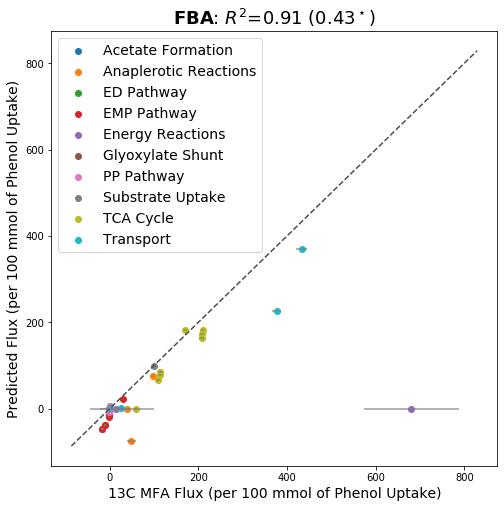

In [9]:
flux_prediction_scatterplot(phenol_fluxes, substrate='phenol', method='FBA', strain='WT', output_dir=output_dir)

Plot phenol pFBA fluxes vs 13C-MFA fluxes

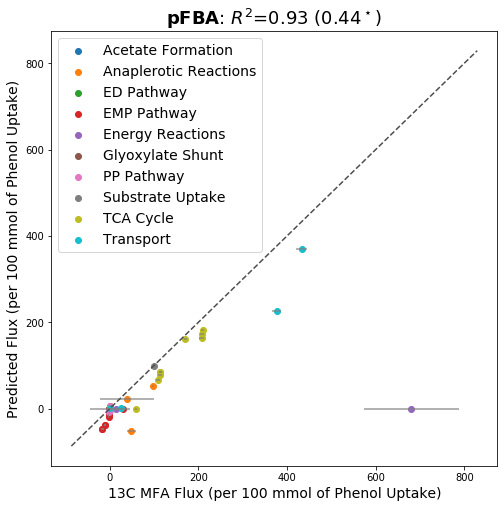

In [10]:
flux_prediction_scatterplot(phenol_fluxes, substrate='phenol', method='pFBA', strain='WT', output_dir=output_dir)

### 5. Generate phenol 13C-MFA, FBA, and pFBA flux maps

Display phenol 13C-MFA flux map

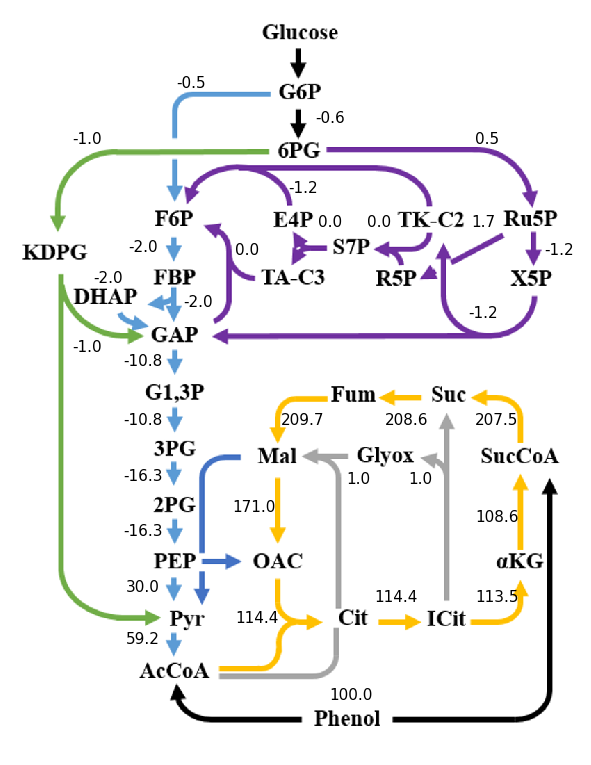

In [11]:
generate_flux_map(phenol_fluxes, '13C Flux', substrate='phenol', method='13C_MFA', strain="WT", output_dir=output_dir)

Display phenol FBA flux map

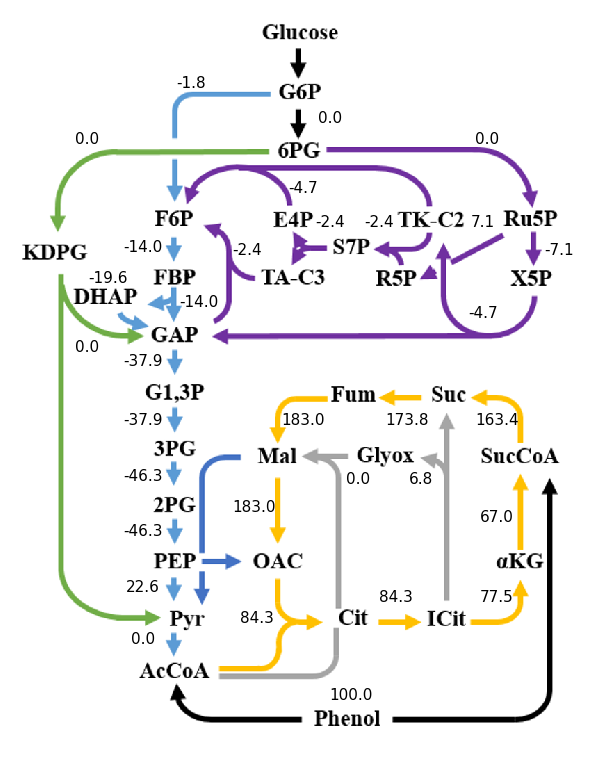

In [12]:
generate_flux_map(phenol_fluxes, 'FBA WT Flux', substrate='phenol', method='FBA', strain="WT", output_dir=output_dir)

Display Phenol pFBA Flux Map

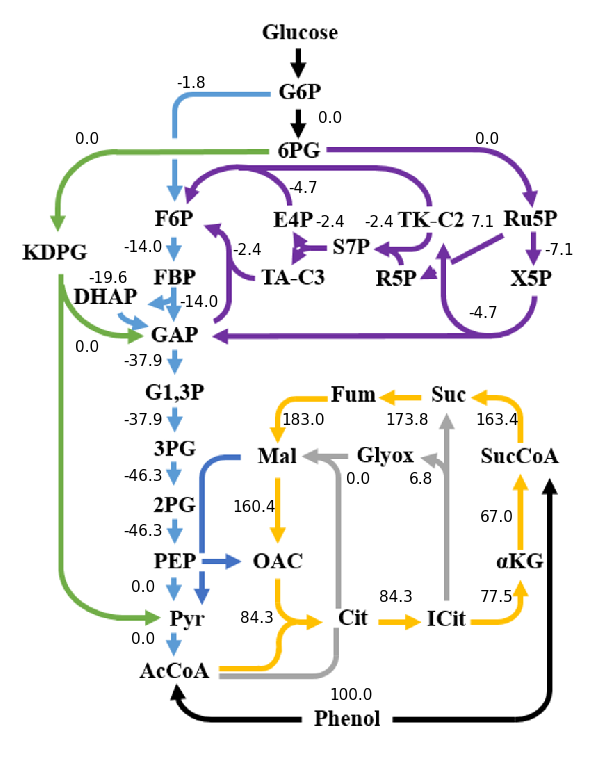

In [13]:
generate_flux_map(phenol_fluxes, 'pFBA WT Flux', substrate='phenol', method='pFBA', strain="WT", output_dir=output_dir)

### 6. Calculate glucose FBA and pFBA solutions

In [14]:
glucose_fba_solution =  get_FBA_solution(model, 'glucose', sub_uptake_rate=100, verbose=True) 
glucose_pfba_solution =  get_pFBA_solution(model, 'glucose', sub_uptake_rate=100, verbose=True) 

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 100,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 100,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

Save glucose FBA flux predictions

In [15]:
glucose_fba_df = cobra_solution_to_df(model, glucose_fba_solution)
glucose_fba_df.to_csv('../data/genome_scale_fluxes/glucose_fba.csv', index=False)

glucose_fba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


Save glucose pFBA flux predictions

In [16]:
glucose_pfba_df = cobra_solution_to_df(model, glucose_pfba_solution)
glucose_pfba_df.to_csv('../data/genome_scale_fluxes/glucose_pfba.csv', index=False)

glucose_pfba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


### 7. Compare phenol FBA and pFBA flux predictions with 13C-MFA fluxes

Copy 13C flux data and remove rows that do not have a mapping to the GSM

In [17]:
glucose_fluxes = glucose_13C_fluxes.copy()

# Remove rows that do not have a mapping to the GSM
glucose_fluxes.dropna(subset = ["Reaction Ids"], inplace=True)
print(f'There are {len(glucose_fluxes)} fluxes that can be compared between the MFA and FBA')

glucose_fluxes.head()

There are 44 fluxes that can be compared between the MFA and FBA


,Pathway,Reaction Ids,Reaction,Location on map,13C Flux,13C Lower Bound,13C Upper Bound
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91


Add glucose FBA and pFBA flux predictions to glucose fluxes dataframe

In [18]:
glucose_fluxes = add_column_to_13C_flux_df(glucose_fluxes, glucose_fba_solution, 'FBA WT Flux')
glucose_fluxes = add_column_to_13C_flux_df(glucose_fluxes, glucose_pfba_solution, 'pFBA WT Flux')
glucose_fluxes.head()

,Pathway,Reaction Ids,Reaction,Location on map,13C Flux,13C Lower Bound,13C Upper Bound,FBA WT Flux,pFBA WT Flux
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00,100.000000,100.000000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42,93.772064,93.772064
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91,78.188362,78.188362
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91,78.188362,78.188362
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91,58.862894,58.862894


Save glucose FBA and pFBA central flux predictions

In [19]:
glucose_fluxes.to_csv('../data/central_fluxes/glucose_FBA_pFBA.csv', index=False)

Plot glucose FBA fluxes vs 13C-MFA fluxes

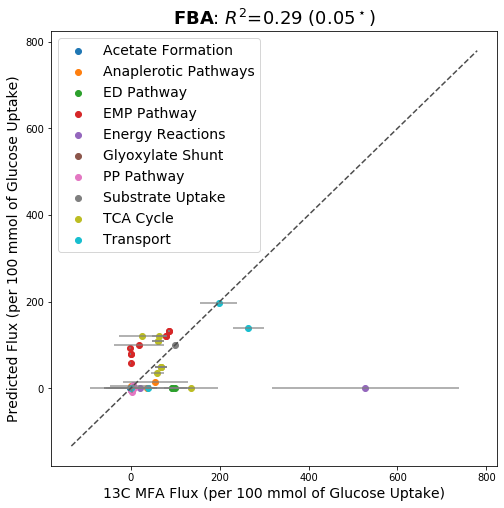

In [20]:
flux_prediction_scatterplot(glucose_fluxes, substrate='glucose', method='FBA', strain='WT', output_dir=output_dir)

Plot glucose pFBA fluxes vs 13C-MFA fluxes

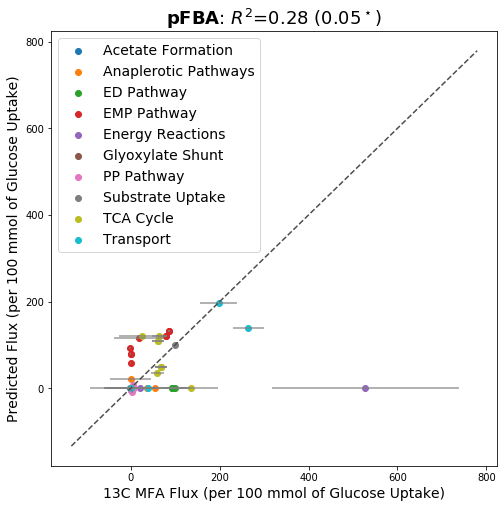

In [21]:
flux_prediction_scatterplot(glucose_fluxes, substrate='glucose', method='pFBA', strain='WT', output_dir=output_dir)

### 8. Generate glucose 13C-MFA, FBA, and pFBA flux maps

Display glucose 13C-MFA flux map

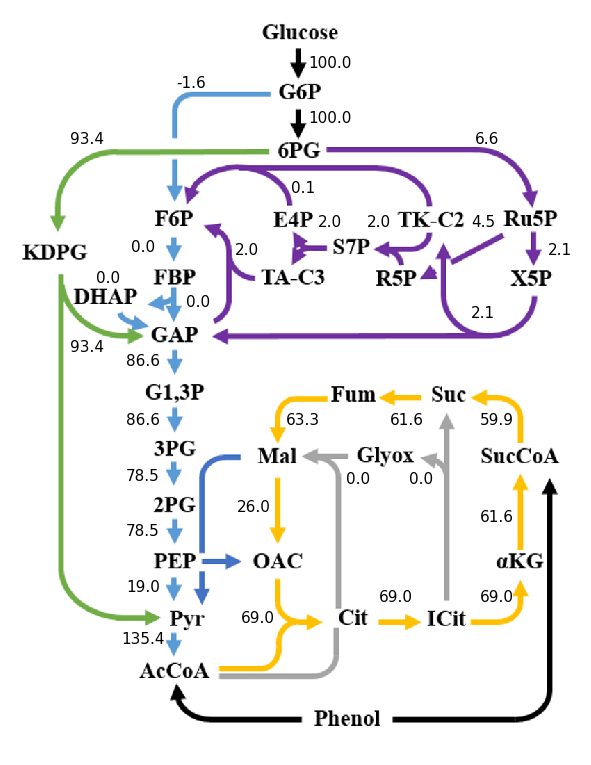

In [22]:
generate_flux_map(glucose_fluxes, '13C Flux', substrate='glucose', method='13C_MFA', strain="WT", output_dir=output_dir)

Display glucose FBA flux map

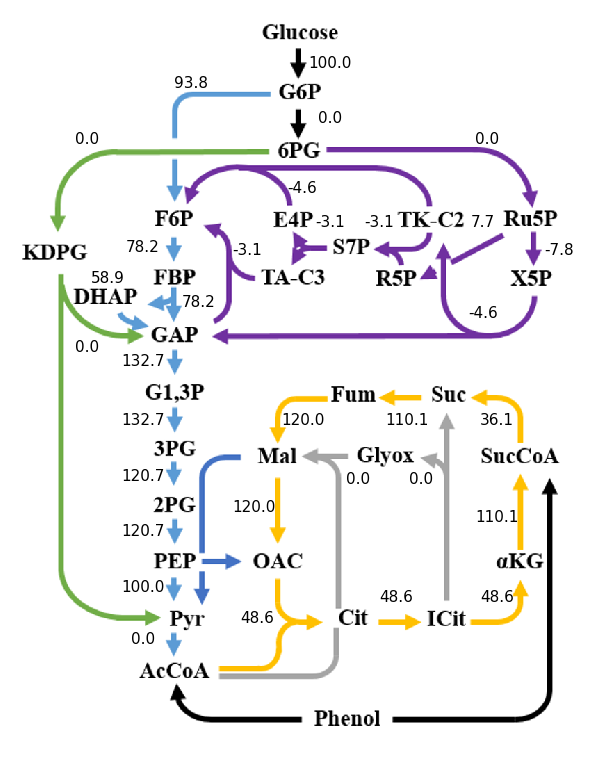

In [23]:
generate_flux_map(glucose_fluxes, 'FBA WT Flux', substrate='glucose', method='FBA', strain="WT", output_dir=output_dir)

Display glucose pFBA flux map

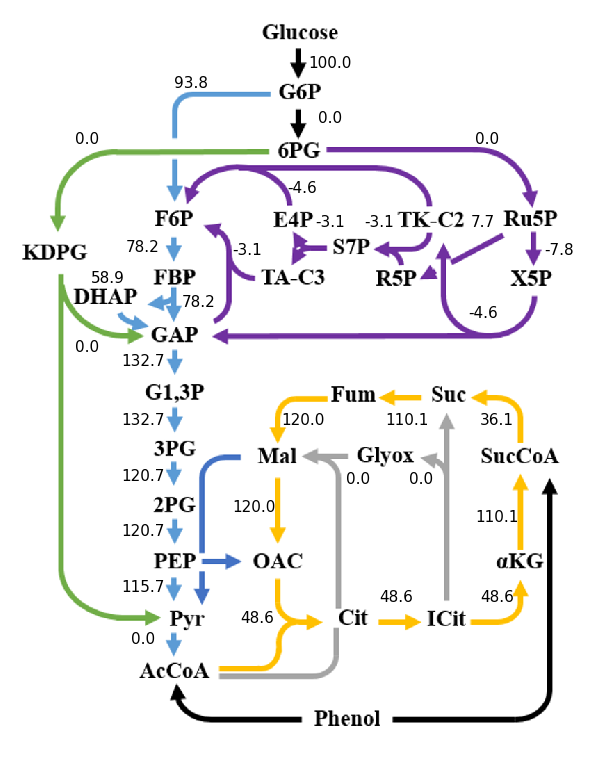

In [24]:
generate_flux_map(glucose_fluxes, 'pFBA WT Flux', substrate='glucose', method='pFBA', strain="WT", output_dir=output_dir)

### 9. Evaluate FBA and pFBA growth rate predictions

Inspect  growth parameters from notebook D

In [25]:
predicted_growth_parameters = growth_parameters.copy()
predicted_growth_parameters

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675


Calculate FBA and pFBA growth rates and add to data frame

In [26]:
fba_growth_rates = []
pfba_growth_rates = []

# loop over strains
for strain in ['WT-P', 'PVHG-P', 'WT-G']:
    
    # get the growth rate per 100 mmol of substrate uptake 
    if '-P' in strain:
        fba_growth_per_100 = phenol_fba_solution['Growth_Phenol']
        pfba_growth_per_100 = phenol_pfba_solution['Growth_Phenol']
    elif '-G' in strain:
        fba_growth_per_100 = glucose_fba_solution['Growth_Glucose']
        pfba_growth_per_100 = glucose_pfba_solution['Growth_Glucose']
        
    # get the experimental uptake rate
    uptake_rate = predicted_growth_parameters.loc[strain,'substrate consumption rate']
        
    # calculate the growth rate adjusted for substrate uptake rate
    fba_growth_rate = (fba_growth_per_100 / 100) * uptake_rate
    pfba_growth_rate = (pfba_growth_per_100 / 100) * uptake_rate
    
    fba_growth_rates.append(fba_growth_rate)
    pfba_growth_rates.append(fba_growth_rate)
    
# add to data
predicted_growth_parameters['FBA growth rate'] = fba_growth_rates
predicted_growth_parameters['pFBA growth rate'] = pfba_growth_rates

predicted_growth_parameters

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,FBA growth rate,pFBA growth rate
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.152788,0.152788
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.222332,0.222332
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.484379,0.484379


Save FBA and pFBA growth rate predictions

In [27]:
predicted_growth_parameters.to_csv('../data/growth_rates/fba_pfba_growth_rates.csv', index=True, header= True)

Plot FBA growth rate predictions

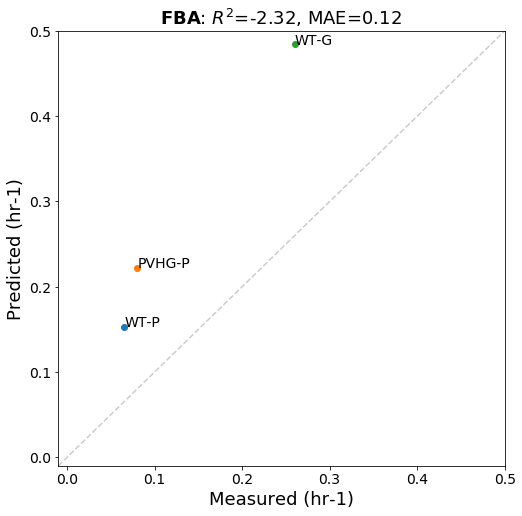

In [28]:
growth_rate_scatterplot(
    predicted_growth_parameters,
    'FBA',
    [-0.01, 0.5], # x limits
    [-0.01, 0.5], # y limits
    output_dir=output_dir
)

Plot pFBA growth rates predictions

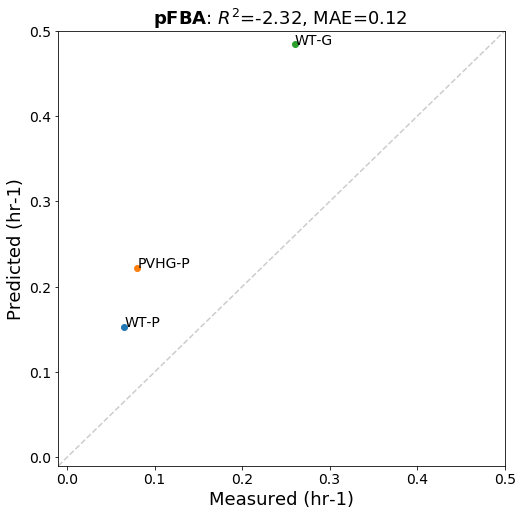

In [29]:
growth_rate_scatterplot(
    predicted_growth_parameters,
    'pFBA',
    [-0.01, 0.5], # x limits
    [-0.01, 0.5], # y limits
    output_dir=output_dir
)